In [95]:
from scipy.special import psi, polygamma, gammaln
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

<h1>3-1. Latent Dirichlet Allocation<span class="tocSkip"></span></h1>
<div class="toc"><ul class="toc-item"><li><span><a href="#Data:-Reuters" data-toc-modified-id="Data:-Reuters-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Data: Reuters</a></span></li><li><span><a href="#Model:-Basic-LDA" data-toc-modified-id="Model:-Basic-LDA-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Model: Basic LDA</a></span><ul class="toc-item"><li><span><a href="#Variational-EM" data-toc-modified-id="Variational-EM-2.1"><span class="toc-item-num">2.1&nbsp;&nbsp;</span>Variational EM</a></span><ul class="toc-item"><li><span><a href="#E-step" data-toc-modified-id="E-step-2.1.1"><span class="toc-item-num">2.1.1&nbsp;&nbsp;</span>E-step</a></span></li><li><span><a href="#M-step" data-toc-modified-id="M-step-2.1.2"><span class="toc-item-num">2.1.2&nbsp;&nbsp;</span>M-step</a></span></li><li><span><a href="#Variational-lower-bound" data-toc-modified-id="Variational-lower-bound-2.1.3"><span class="toc-item-num">2.1.3&nbsp;&nbsp;</span>Variational lower bound</a></span></li></ul></li><li><span><a href="#Training" data-toc-modified-id="Training-2.2"><span class="toc-item-num">2.2&nbsp;&nbsp;</span>Training</a></span></li><li><span><a href="#Collapsed-Gibbs-Sampling" data-toc-modified-id="Collapsed-Gibbs-Sampling-2.3"><span class="toc-item-num">2.3&nbsp;&nbsp;</span>Collapsed Gibbs Sampling</a></span></li></ul></li><li><span><a href="#Model:-Smoothed-LDA" data-toc-modified-id="Model:-Smoothed-LDA-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Model: Smoothed LDA</a></span><ul class="toc-item"><li><span><a href="#Collaped-Gibbs-Sampling" data-toc-modified-id="Collaped-Gibbs-Sampling-3.1"><span class="toc-item-num">3.1&nbsp;&nbsp;</span>Collaped Gibbs Sampling</a></span></li><li><span><a href="#Variational-EM" data-toc-modified-id="Variational-EM-3.2"><span class="toc-item-num">3.2&nbsp;&nbsp;</span>Variational EM</a></span><ul class="toc-item"><li><span><a href="#E-step" data-toc-modified-id="E-step-3.2.1"><span class="toc-item-num">3.2.1&nbsp;&nbsp;</span>E-step</a></span></li><li><span><a href="#M-step" data-toc-modified-id="M-step-3.2.2"><span class="toc-item-num">3.2.2&nbsp;&nbsp;</span>M-step</a></span></li></ul></li></ul></li></ul></div>

## Data: Reuters

Reuters is a multi-class, multi-label dataset.

* 90 classes
* 10788 documents
    * 7769 training documents
    * 3019 testing documents

In [2]:
from nltk.corpus import reuters
from nltk.corpus import stopwords

* train-test split
: The data is already splitted. Just sort it out.

In [69]:
stops = stopwords.words("english")
stops += [
    "a", "about", "above", "across", "after", "afterwards", "again", "against",
    "all", "almost", "alone", "along", "already", "also", "although", "always",
    "am", "among", "amongst", "amoungst", "amount", "an", "and", "another",
    "any", "anyhow", "anyone", "anything", "anyway", "anywhere", "are",
    "around", "as", "at", "back", "be", "became", "because", "become",
    "becomes", "becoming", "been", "before", "beforehand", "behind", "being",
    "below", "beside", "besides", "between", "beyond", "bill", "both",
    "bottom", "but", "by", "call", "can", "cannot", "cant", "co", "con",
    "could", "couldnt", "cry", "de", "describe", "detail", "do", "done",
    "down", "due", "during", "each", "eg", "eight", "either", "eleven", "else",
    "elsewhere", "empty", "enough", "etc", "even", "ever", "every", "everyone",
    "everything", "everywhere", "except", "few", "fifteen", "fifty", "fill",
    "find", "fire", "first", "five", "for", "former", "formerly", "forty",
    "found", "four", "from", "front", "full", "further", "get", "give", "go",
    "had", "has", "hasnt", "have", "he", "hence", "her", "here", "hereafter",
    "hereby", "herein", "hereupon", "hers", "herself", "him", "himself", "his",
    "how", "however", "hundred", "i", "ie", "if", "in", "inc", "indeed",
    "interest", "into", "is", "it", "its", "itself", "keep", "last", "latter",
    "latterly", "least", "less", "ltd", "made", "many", "may", "me",
    "meanwhile", "might", "mill", "mine", "more", "moreover", "most", "mostly",
    "move", "much", "must", "my", "myself", "name", "namely", "neither",
    "never", "nevertheless", "next", "nine", "no", "nobody", "none", "noone",
    "nor", "not", "nothing", "now", "nowhere", "of", "off", "often", "on",
    "once", "one", "only", "onto", "or", "other", "others", "otherwise", "our",
    "ours", "ourselves", "out", "over", "own", "part", "per", "perhaps",
    "please", "put", "rather", "re", "same", "see", "seem", "seemed",
    "seeming", "seems", "serious", "several", "she", "should", "show", "side",
    "since", "sincere", "six", "sixty", "so", "some", "somehow", "someone",
    "something", "sometime", "sometimes", "somewhere", "still", "such",
    "system", "take", "ten", "than", "that", "the", "their", "them",
    "themselves", "then", "thence", "there", "thereafter", "thereby",
    "therefore", "therein", "thereupon", "these", "they", "thick", "thin",
    "third", "this", "those", "though", "three", "through", "throughout",
    "thru", "thus", "to", "together", "too", "top", "toward", "towards",
    "twelve", "twenty", "two", "un", "under", "until", "up", "upon", "us",
    "very", "via", "was", "we", "well", "were", "what", "whatever", "when",
    "whence", "whenever", "where", "whereafter", "whereas", "whereby",
    "wherein", "whereupon", "wherever", "whether", "which", "while", "whither",
    "who", "whoever", "whole", "whom", "whose", "why", "will", "with",
    "within", "without", "would", "yet", "you", "your", "yours", "yourself",
    "yourselves", ".", "!", "?", ",", ";", ":", "[", "]", "{", "}", "-", "+", 
    "_", "/", "@", "#", "$", "%", "^", "&", "*", "(", ")", "<", ">", "|", "=",
    ".-", ".,", "'", '"', ',"'
]

In [70]:
reuters.words()[:10]

['ASIAN', 'EXPORTERS', 'FEAR', 'DAMAGE', 'FROM', 'U', '.', 'S', '.-', 'JAPAN']

In [71]:
trainset, testset = [], []
vocab = []
for file_id in reuters.fileids():
    if file_id.startswith("train"):
        trainset.append([w.lower() for w in reuters.words(file_id) \
                         if (w.lower() not in stops) \
                         and (not w.isnumeric())])
        vocab += trainset[-1]
    else:
        testset.append([w.lower() for w in reuters.words(file_id) \
                         if (w.lower() not in stops) \
                         and (not w.isnumeric())])

In [72]:
vocab = list(set(vocab))
word_to_ix = {w: i for i, w in enumerate(vocab)}

In [73]:
def seq_to_ix(seq, vocab=vocab):
    # len(vocab), which is the last index, is for the <unk> (unknown) token
    unk_idx = len(vocab)
    return np.array(list(map(lambda w: word_to_ix.get(w, unk_idx), seq)))

data = {
    "train": list(map(seq_to_ix, trainset)),
    "test": list(map(seq_to_ix, testset))
}

In [74]:
data["train"][0][:5]  # word indices

array([14079, 12862, 24273, 21913,  5652])

## Model: Basic LDA

### Variational EM

For each document $\mathbf{w}$ in a corpus $D$, generate

$$
N \sim \mathcal{P}(\xi) \\
\theta \sim \text{Dir}(\alpha)
$$

and for $n = 1, \cdots, N$, generate

$$
z_n \sim \text{Multi}(\theta) \\
w_n \sim P(w_n | z_n, \beta)
$$

where $\beta \in \mathbb{R}^{k \times V}$, $\beta_{ij} = P(w^j = 1| z^i = 1)$.

* $\alpha, \beta$: hyperparameters (Dirichlet, Multinomial).
* $N$: The number of words in the document. (ancillary variable)
* $\theta$: A topic mixture.
* (For $i$ in $1\cdots N$)
  * $z_n$: A topic variable.
  * $w_n$: A generated word.

In [75]:
def init_lda(docs, n_topic, random_state=0):
    global V, k, N, M, alpha, beta, gamma, phi
    np.random.seed(random_state)
    
    V = len(vocab)
    k = n_topic  # number of topics
    N = np.array([doc.shape[0] for doc in docs])
    M = len(docs)

    print(f"V: {V}\nk: {k}\nN: {N[:10]}...\nM: {M}")

    # initialize α, β
    alpha = np.random.gamma(shape=100, scale=0.01, size=k) #np.random.rand(k)
    beta = np.random.dirichlet(np.ones(V), k)

    print(f"α: dim {alpha.shape}\nβ: dim {beta.shape}")

    # initialize ϕ, γ
    ## ϕ: (M x max(N) x k) arrays with zero paddings on the right
    gamma = alpha + np.ones((M, k)) * N.reshape(-1, 1) / k

    phi = np.ones((M, max(N), k)) / k
    for m, N_d in enumerate(N):
        phi[m, N_d:, :] = 0  # zero padding for vectorized operations

    print(f"γ: dim {gamma.shape}\nϕ: dim ({len(phi)}, N_d, {phi[0].shape[1]})")

#### E-step

Let $\phi_d \in \mathbb{R}^{N \times k}, \gamma_d \in \mathbb{R}^k$ be variational parameters for $\alpha, \beta$.

For a document $\mathbf{w}_d$, $d = 1,\cdots,M$,

1. initialize $\phi_{dni}^0 := 1/k$ for all $i,n$.
2. initialize $\gamma_{di}^0 := \alpha_i + N/k$ for all $i$.
3. **repeat until** convergence
    1. for $n=1$ to $N$
        1. for $i=1$ to $k$
            1. $\phi_{dni}^{t+1} := \beta_{i\mathbf{w}_{dn}}\exp\left(\Psi(\gamma_{di}^t) - \Psi(\sum_{j=1}^k \gamma_{dj}^t)\right)$
        2. normalize $\phi_{dn}^{t+1}$ to sum to 1
    2. $\gamma_d^{t+1} := \alpha + \sum_{n=1}^N \phi_{dn}^{t+1}$
    
where $\Psi$ is the first derivative of the $\log\Gamma$ function.

In [76]:
from tqdm.auto import tqdm

def E_step(docs, phi, gamma, alpha, beta):
    """
    Minorize the joint likelihood function via variational inference.
    This is the E-step of variational EM algorithm for (smoothed) LDA.
    """
    # optimize phi
    for m in range(M):
        phi[m, :N[m], :] = (beta[:, docs[m]] * np.exp(psi(gamma[m, :]) - psi(gamma[m, :].sum())).reshape(-1, 1)).T

        # Normalize phi
        phi[m, :N[m]] /= phi[m, :N[m]].sum(axis=1).reshape(-1, 1)
        if np.any(np.isnan(phi)):
            raise ValueError("phi nan")

    # optimize gamma
    gamma = alpha + phi.sum(axis=1)

    return phi, gamma

#### M-step

$$
\beta_{ij} \propto \sum_{d=1}^M \sum_{n=1}^N \phi_{dni} \mathbf{w}_{dn}^j
$$

$\alpha$ is updated via Newton-Raphson method:

$$
\frac{\partial L}{\partial \alpha_i} 
  = M\left( \Psi\left(\sum_{j=1}^k \alpha_j\right) - \Psi(\alpha_i) \right)
    - \sum_{d=1}^M \left( \Psi(\gamma_{di}) - \Psi\left(\sum_{j=1}^k \gamma_{dj}\right) \right) \\
\frac{\partial^2 L}{\partial \alpha_i \alpha_j} = M \left( \Psi'\left(\sum_{j=1}^k \alpha_j\right) - \delta(i,j) \Psi'(\alpha_i) \right)
$$

where $\delta(i,j) = 1$ if $i=j$, $0$ otherwise.

In [77]:
def M_step(docs, phi, gamma, alpha, beta, M):
    """
    maximize the lower bound of the likelihood.
    This is the M-step of variational EM algorithm for (smoothed) LDA.
    
    update of alpha follows from appendix A.2 of Blei et al., 2003.
    """
    # update alpha
    alpha = _update(alpha, gamma, M)
    
    # update beta
    for j in range(V):
        beta[:, j] = np.array([_inner_sum(docs, phi, m, j) for m in range(M)]).sum(axis=0)
    beta /= beta.sum(axis=1).reshape(-1, 1)

    return alpha, beta

In [78]:
import warnings

def _update(var, vi_var, const, max_iter=10000, tol=1e-4):
    """
    From appendix A.2 of Blei et al., 2003.
    For hessian with shape `H = diag(h) + 1z1'`
    
    To update alpha, input var=alpha and vi_var=gamma, const=M.
    To update eta, input var=eta and vi_var=lambda, const=k.
    """
    for _ in range(max_iter):
        # store old value
        var0 = var.copy()
        
        # g: gradient 
        psi_sum = psi(vi_var.sum(axis=1)).reshape(-1, 1)
        g = const * (psi(var.sum()) - psi(var)) \
            + (psi(vi_var) - psi_sum).sum(axis=0)

        # H = diag(h) + 1z1'
        z = const * polygamma(1, var.sum())  # z: Hessian constant component
        h = -const * polygamma(1, var)       # h: Hessian diagonal component
        c = (g / h).sum() / (1./z + (1./h).sum())

        # update var
        var -= (g - c) / h
        
        # check convergence
        err = np.mean((var - var0) ** 2)
        crit = err < tol ** 2
        if crit:
            break
    else:
        warnings.warn(f"max_iter={max_iter} reached: values might not be optimal.")
    
    #print(err)
    return var

def _inner_sum(docs, phi, m, j):
    # doc = np.zeros(docs[m].shape[0] * V, dtype=int)
    # doc[np.arange(0, docs[m].shape[0] * V, V) + docs[m]] = 1
    # doc = doc.reshape(-1, V)
    # lam += phi[m, :N[m], :].T @ doc
    return (docs[m] == j) @ phi[m, :N[m], :]

#### Variational lower bound

$$\begin{align}
L(\gamma, \phi; \alpha, \beta)
  &= \log\Gamma(\sum_{j=1}^k \alpha_j) - \sum_{i=1}^k \log\Gamma(\alpha_i) + \sum_{i=1}^k (\alpha_i - 1) \left(\Psi(\gamma_i) - \Psi(\sum_{i=1}^k \gamma_i)\right) \\
  &+ \sum_{n=1}^N \sum_{i=1}^k \phi_{ni} \left(\Psi(\gamma_i) - \Psi(\sum_{i=1}^k \gamma_i)\right) \\
  &+ \sum_{n=1}^N \sum_{i=1}^k \sum_{j=1}^V \phi_{ni} \mathbf{w}_{n}^j \log\beta_{ij} \\
  &- \log\Gamma(\sum_{i=1}^k \gamma_i) + \sum_{i=1}^k \log\Gamma(\gamma_i) - \sum_{i=1}^k (\gamma_i - 1) \left(\Psi(\gamma_i) - \Psi(\sum_{i=1}^k \gamma_i)\right) \\
  &- \sum_{n=1}^N \sum_{i=1}^k \phi_{ni} \log\phi_{ni}
\end{align}$$

In [79]:
def dg(gamma, d, i):
    """
    E[log θ_t] where θ_t ~ Dir(gamma)
    """
    return psi(gamma[d, i]) - psi(np.sum(gamma[d, :]))


def dl(lam, i, w_n):
    """
    E[log β_t] where β_t ~ Dir(lam)
    """
    return psi(lam[i, w_n]) - psi(np.sum(lam[i, :]))

def vlb(docs, phi, gamma, alpha, beta, M, N, k):
    """
    Average variational lower bound for joint log likelihood.
    """
    lb = 0
    for d in range(M):
        lb += (
            gammaln(np.sum(alpha))
            - np.sum(gammaln(alpha))
            + np.sum([(alpha[i] - 1) * dg(gamma, d, i) for i in range(k)])
        )

        lb += (
            gammaln(np.sum(gamma[d, :]))
            - np.sum(gammaln(gamma[d, :]))
            + np.sum([(gamma[d, i] - 1) * dg(gamma, d, i) for i in range(k)])
        )

        for n in range(N[d]):
            w_n = int(docs[d][n])

            lb += np.sum([phi[d][n, i] * dg(gamma, d, i) for i in range(k)])
            lb += np.sum([phi[d][n, i] * np.log(beta[i, w_n]) for i in range(k)])
            lb += np.sum([phi[d][n, i] * np.log(phi[d][n, i]) for i in range(k)])

    return lb / M

### Training

Only on 100 documents

In [80]:
docs = data["train"][:100]

In [81]:
init_lda(docs, n_topic=5)

V: 24714
k: 5
N: [264 127  59  74  55  18 117  43  86  76]...
M: 100
α: dim (5,)
β: dim (5, 24714)
γ: dim (100, 5)
ϕ: dim (100, N_d, 5)


In [82]:
%%time

N_EPOCH = 1000
TOL = .1

verbose = True
lb = -np.inf

for epoch in range(N_EPOCH): 
    # store old value
    lb_old = lb
    
    # Variational EM
    phi, gamma = E_step(docs, phi, gamma, alpha, beta)
    alpha, beta = M_step(docs, phi, gamma, alpha, beta, M)
    
    # check anomaly
    if np.any(np.isnan(alpha)):
        print("NaN detected: alpha")
        break
    
    # check convergence
    lb = vlb(docs, phi, gamma, alpha, beta, M, N, k)
    err = abs(lb - lb_old)
    
    # check anomaly
    if np.isnan(lb):
        print("NaN detected: lb")
        break
        
    if verbose:
        print(f"{epoch: 04}:  variational_lb: {lb: .3f},  error: {err: .3f}")
    
    if err < TOL:
        break
else:
    warnings.warn(f"max_iter reached: values might not be optimal.")

print(" ========== TRAINING FINISHED ==========")

 000:  variational_lb: -582.986
 001:  variational_lb: -577.172
 002:  variational_lb: -571.734
 003:  variational_lb: -564.618
 004:  variational_lb: -553.614
 005:  variational_lb: -536.302
 006:  variational_lb: -511.802
 007:  variational_lb: -482.697
 008:  variational_lb: -453.737
 009:  variational_lb: -428.951
 010:  variational_lb: -409.294
 011:  variational_lb: -393.378
 012:  variational_lb: -378.997
 013:  variational_lb: -364.497
 014:  variational_lb: -350.007
 015:  variational_lb: -335.778
 016:  variational_lb: -322.113
 017:  variational_lb: -308.693
 018:  variational_lb: -295.426
 019:  variational_lb: -282.391
 020:  variational_lb: -269.388
 021:  variational_lb: -255.742
 022:  variational_lb: -240.965
 023:  variational_lb: -225.460
 024:  variational_lb: -209.621
 025:  variational_lb: -194.219
 026:  variational_lb: -179.056
 027:  variational_lb: -163.616
 028:  variational_lb: -148.061
 029:  variational_lb: -132.800
 030:  variational_lb: -117.660
 031:  v

<ipython-input-79-1f6ac6fbd577>:36: RuntimeWarning: divide by zero encountered in log
  lb += np.sum([phi[d][n, i] * np.log(beta[i, w_n]) for i in range(k)])
<ipython-input-79-1f6ac6fbd577>:36: RuntimeWarning: invalid value encountered in double_scalars
  lb += np.sum([phi[d][n, i] * np.log(beta[i, w_n]) for i in range(k)])
<ipython-input-79-1f6ac6fbd577>:37: RuntimeWarning: divide by zero encountered in log
  lb += np.sum([phi[d][n, i] * np.log(phi[d][n, i]) for i in range(k)])
<ipython-input-79-1f6ac6fbd577>:37: RuntimeWarning: invalid value encountered in double_scalars
  lb += np.sum([phi[d][n, i] * np.log(phi[d][n, i]) for i in range(k)])


NaN detected: lb
 ========== TRAINING FINISHED ==========
CPU times: user 2min 49s, sys: 493 ms, total: 2min 50s
Wall time: 2min 49s


Training result

1. Topic extraction

In [83]:
def n_most_important(beta_i, n=30):
    """
    find the index of the largest `n` values in a list
    """
    
    max_values = beta_i.argsort()[-n:][::-1]
    return np.array(vocab)[max_values]

In [84]:
for i in range(k):
    print(f"TOPIC {i:02}: {n_most_important(beta[i], 10)}")

TOPIC 00: ['said' 'oil' 'dlrs' 'bp' 'u' 'lt' 'standard' ',"' 'offer' 'year']
TOPIC 01: ['vs' 'mln' 'loss' 'cts' 'net' 'shr' 'year' 'profit' 'revs' 'dlrs']
TOPIC 02: ['said' 'lt' 'company' 'cts' 'quarter' 'stock' 'share' 'corp' 'dlrs'
 'april']
TOPIC 03: ['said' 'dlrs' 'new' 'cocoa' 'stock' 'crop' 'bales' 'farmers' 'u' 'buffer']
TOPIC 04: ['said' 'pct' 'billion' 'bank' 'heller' 'mln' 'year' 'financial' 'cubic'
 'company']


2. Topic-word distribution

In [100]:
?sns.clustermap

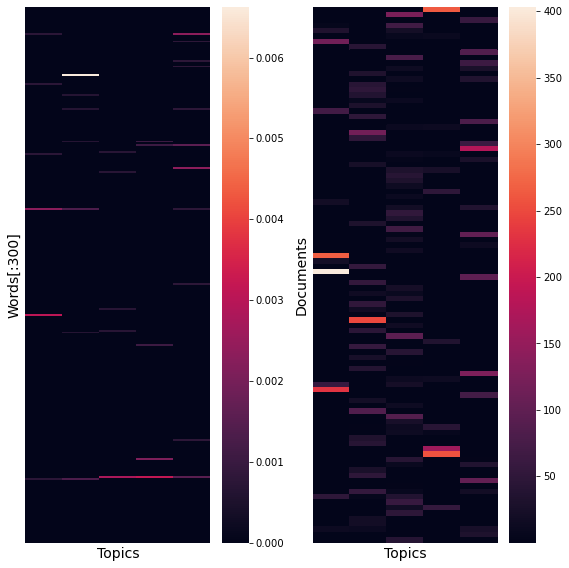

In [124]:
plt.figure(figsize=(8,8))
plt.subplot(121)
sns.heatmap(beta.T[:300], xticklabels=[], yticklabels=[])
plt.xlabel("Topics", fontsize=14)
plt.ylabel("Words[:300]", fontsize=14)

plt.subplot(122)
sns.heatmap(gamma, xticklabels=[], yticklabels=[])
plt.xlabel("Topics", fontsize=14)
plt.ylabel("Documents", fontsize=14)

plt.tight_layout();

### Collapsed Gibbs Sampling

---

## Model: Smoothed LDA

For each document $\mathbf{w}$ in a corpus $D$, generate

$$
N \sim \mathcal{P}(\xi) \\
\beta \sim \text{Dir}(\lambda) \\
\theta \sim \text{Dir}(\alpha)
$$

and for $n = 1, \cdots, N$, generate

$$
z_n \sim \text{Multi}(\theta) \\
w_n \sim P(w_n | z_n, \beta)
$$

where $\beta \in \mathbb{R}^{k \times V}$, $\beta_{ij} = P(w^j = 1| z^i = 1)$.

* $\alpha, \eta$: Dirichlet hyperparameters.
* $\beta$: Unsmoothed multinomial hyperparameter.
* $N$: The number of words in the document. (ancillary variable)
* $\theta$: A topic mixture.
* (For $i$ in $1\cdots N$)
  * $z_n$: A topic variable.
  * $w_n$: A generated word.

### Collaped Gibbs Sampling

### Variational EM

#### E-step

Let $\phi_d \in \mathbb{R}^{N \times k}, \gamma_d \in \mathbb{R}^k, \lambda \in \mathbb{R}^{k \times V}$ be variational parameters for $\alpha, \beta, \eta$.  
Suppose further that for $\beta \in \mathbb{R}^{k \times V}$, $\beta_i^0 \sim \text{Dir}(\lambda^0)$ where $\lambda_i^0 = \eta$ for all $i$.

For a document $\mathbf{w}_d$, $d = 1,\cdots,M$,

1. initialize $\phi_{dni}^0 := 1/k$ for all $i,n$.
2. initialize $\gamma_{di} := \alpha_i + N/k$ for all $i$.
3. **repeat until** convergence
    1. for $n=1$ to $N$
        1. for $i=1$ to $k$
            1. $\phi_{dni}^{t+1} := \exp\left(\Psi(\lambda_{iw_{dn}}^t) - \Psi(\sum_{j=1}^V \lambda_{ij}^t) + \Psi(\gamma_{di}^t) - \Psi(\sum_{j=1}^k \gamma_{dj}^t)\right)$
            1. for $j=1$ to $V$
                1. $\lambda_{ij} = \eta + \sum_{d=1}^M \sum_{n=1}^{N_d} \phi_{dni} w_{dn}^j$
        2. normalize $\phi_{dn}^{t+1}$ to sum to 1
    2. $\gamma_d^{t+1} := \alpha + \sum_{n=1}^N \phi_{dn}^{t+1}$
    
where $\Psi$ is the first derivative of the $\log\Gamma$ function.

#### M-step

$$
\beta_{ij} \propto \sum_{d=1}^M \sum_{n=1}^N \phi_{dni} \mathbf{w}_{dn}^j
$$

$\alpha$ is updated via Newton-Raphson method:

$$
\frac{\partial L}{\partial \alpha_i} 
  = M\left( \Psi\left(\sum_{j=1}^k \alpha_j\right) - \Psi(\alpha_i) \right)
    - \sum_{d=1}^M \left( \Psi(\gamma_{di}) - \Psi\left(\sum_{j=1}^k \gamma_{dj}\right) \right) \\
\frac{\partial^2 L}{\partial \alpha_i \alpha_j} = M \left( \Psi'\left(\sum_{j=1}^k \alpha_j\right) - \delta(i,j) \Psi'(\alpha_i) \right)
$$

where $\delta(i,j) = 1$ if $i=j$, $0$ otherwise.

In [185]:
class SmoothedLDA:
    
    def __init__(self, docs, vocab, k):
        self.docs = docs
        
        self.V = len(vocab)
        self.k = k  # number of topics
        self.N = np.array([doc.shape[0] for doc in docs])
        self.M = len(docs)
        
        V = self.V
        N = self.N
        M = self.M
        
        # initialize model parameters
        ##self.beta = np.ones((k, V)) / V
        self.alpha = np.random.gamma(100, 0.01, k)
        self.eta = np.ones(V)

        # initialize variational parameters
        # ϕ: (M x max(N) x k) arrays with zero paddings on the right
        self.phi = [np.ones((N[d], k)) / k for d in range(M)]
        self.gamma = alpha + (N / k).reshape(-1, 1)
        self.lam = np.random.gamma(shape=100, scale=0.01, size=(k, V))
        
        
    def _update_phi(self):
        """
        Update variational parameter phi
        ϕ_{n, j} ∝ e^[ (Ψ(λ_j) - Ψ(Σλ_j)) + ( Ψ(γ_j) - Ψ(Σγ_j) ) ]
        """
        M = self.M
        N = self.N
        k = self.k

        phi = self.phi
        gamma = self.gamma
        docs = self.docs

        for d in range(M):
            for n in range(N[d]):
                for i in range(k):
                    w_n = int(docs[d][n])
                    phi[d][n, i] = np.exp(dl(lam, i, w_n) + dg(gamma, d, i))

                # Normalize over topics
                phi[d][n, :] = phi[d][n, :] / np.sum(phi[d][n, :])
                
        return phi
    
    def _update_gamma(self):
        """
        Update variational parameter gamma
        γ_t = α_t + Σ_{n=1}^{N_d} ϕ_{t, n}
        """
        M = self.M
        phi = self.phi
        alpha = self.alpha

        gamma = alpha + np.array(
            list(map(lambda x: x.sum(axis=0), phi))
        )
        
        return gamma
    
    
    def _update_lam(self):
        V = self.V
        N = self.N
        M = self.M
        phi = self.phi
        lam = self.lam
        eta = self.eta
        docs = self.docs
        
        lam[:] = eta
        for d in range(M):  #, desc="MINORIZE lam"):
            doc = np.zeros(N[d] * V, dtype=int)
            doc[np.arange(0, N[d] * V, V) + docs[d]] = 1
            doc = doc.reshape(-1, V)
            
            lam += phi[d].T @ doc
        
        return lam
        
    
    def _update_alpha(self, max_iter=1000, tol=0.1):
        """
        Update alpha with linear time Newton-Raphson.
        """
        M = self.M
        k = self.k

        alpha = self.alpha
        gamma = self.gamma

        for _ in range(max_iter):
            alpha_old = alpha

            #  Calculate gradient
            g = M * (psi(np.sum(alpha)) - psi(alpha)) +\
                (psi(gamma) - psi(np.sum(gamma, axis=1)).reshape(-1, 1)).sum(axis=0)

            #  Calculate Hessian diagonal component
            h = -M * polygamma(1, alpha)

            #  Calculate Hessian constant component
            z = M * polygamma(1, np.sum(alpha))

            #  Calculate constant
            c = np.sum(g / h) / (z ** (-1.0) + np.sum(h ** (-1.0)))

            #  Update alpha
            alpha = alpha - (g - c) / h
            
            #  Check convergence
            if np.sqrt(np.mean(np.square(alpha - alpha_old))) < tol:
                break
        else:
            warnings.warn("_update_alpha(): max_iter reached.")

        return alpha
    
    
    def _update_eta(self, max_iter=1000, tol=0.1):
        """
        Update eta with linear time Newton-Raphson.
        """
        M = self.M
        k = self.k

        eta = self.eta
        lam = self.lam

        for _ in range(max_iter):
            eta_old = eta

            #  Calculate gradient
            g = k * (psi(np.sum(eta)) - psi(eta)) +\
                (psi(lam) - psi(np.sum(lam, axis=1)).reshape(-1, 1)).sum(axis=0)

            #  Calculate Hessian diagonal component
            h = -k * polygamma(1, eta)

            #  Calculate Hessian constant component
            z = k * polygamma(1, np.sum(eta))

            #  Calculate constant
            c = np.sum(g / h) / (z ** (-1.0) + np.sum(h ** (-1.0)))

            #  Update alpha
            eta = eta - (g - c) / h

            #  Check convergence
            if np.sqrt(np.mean(np.square(eta - eta_old))) < tol:
                break
        else:
            warnings.warn("_update_eta(): max_iter reached.")

        return eta
    
    
    def _E_step(self):
        """
        E-step of the variational EM algorithm.
        Update ϕ, γ, λ.
        """
        self.phi = self._update_phi()
        self.gamma = self._update_gamma()
        self.lam = self._update_lam()
        
        
    def _M_step(self):
        """
        M-step of the variational EM algorithm.
        Update α, η.
        """
        self.alpha = self._update_alpha()
        self.eta = self._update_eta()
    
    
    def vlb(self):
        """
        lower bound from variational inference
        """
        phi = self.phi
        gamma = self.gamma
        lam = self.lam
        alpha = self.alpha
        eta = self.eta
        docs = self.docs
        
        M = self.M
        k = self.k
        N = self.N
        
        a0, a1, a2, a3_1, a3_2, a4, a5 = 0., 0., 0., 0., 0., 0., 0.
        for d in range(M):
            a0 += (
                k * (
                    gammaln(np.sum(eta)) 
                    - np.sum(gammaln(eta))
                )
                + np.sum([(eta[j] - 1) * dl(lam, i, j) for j in range(V) for i in range(k)])
            )
            a1 += (
                gammaln(np.sum(alpha))
                - np.sum(gammaln(alpha))
                + np.sum([(alpha[i] - 1) * dg(gamma, d, i) for i in range(k)])
            )

            a4 += (
                gammaln(np.sum(gamma[d, :]))
                - np.sum(gammaln(gamma[d, :]))
                + np.sum([(gamma[d, i] - 1) * dg(gamma, d, i) for i in range(k)])
            )
            
            for i in range(k):
                for j in range(V):
                    a3_2 += (
                        gammaln(np.sum(lam[i, j]))
                        - np.sum(gammaln(lam[i, :]))
                        + np.sum((lam[i, j] - 1) * dl(lam, i, j))
                    )

            for n in range(N[d]):
                w_n = int(docs[d][n])
                a2 += np.sum([phi[d][n, i] * dg(gamma, d, i) for i in range(k)])
                a3_1 += np.sum([phi[d][n, i] * dl(lam, i, w_n) for i in range(k)])
                a5 += np.sum([phi[d][n, i] * np.log(phi[d][n, i]) for i in range(k)])

        return a0 + a1 + a2 + a3_1 - a3_2 - a4 - a5
    
    
    def train(self, max_iter=1000, tol=5, verbose=True):
        vlb = -np.inf
        
        for it in range(max_iter):
            old_vlb = vlb
            self._E_step()
            self._M_step()
            
            vlb = self.vlb()
            err = vlb - old_vlb
            
            if verbose:
                print(f"Iteration {it+1}: {vlb: .3f} (delta: {err: .2f})") 
            
            if err < tol:
                break
        else:
            warnings.warn("max_iter reached.")

```python
lda = SmoothedLDA(docs, vocab, k)
lda.train()
```